In [133]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
from scipy.optimize import minimize
import os

In [134]:
#plt.style.use(['science', 'notebook', 'grid'])

In [135]:
near_fault = ['san_fernando_nf', 'tabas_nf', 'landers_nf', 'northridge_1050', 'northridge_1051', 'kocaeli_geb_nf', 'kocaeli_iz_nf', 'loma_prieta_nf', 'cape_mendocino', 'l_aquila']
far_fault = ['coyote_lake', 'nw_calif', 'santa_barbara', 'borrego', 'coalinga', 'san_fernando', 'trinidad', 'kocaeli', 'tabas', 'duzce'] 
earthquakes = near_fault + far_fault

In [136]:
pgas = np.arange(0.1, 1.1, 0.1).round(1)

In [137]:
def get_peaks(eq_type):
    """
    eq_type: near_fault or far_fault list
    
    """
    variables = {}
    filename = 'peaks.csv'
    for eq in earthquakes:
        if eq in eq_type:
            varble = []
            for pga in pgas:
                path = os.path.join(eq, str(pga), filename)
                df = pd.read_csv(path)
                varble.append(df['psd'].values[0])
            variables[eq] = varble
    var_df = pd.DataFrame(variables)
    return var_df

In [138]:
df_ff = get_peaks(far_fault)
df_nf = get_peaks(near_fault)

In [139]:
df_ff

,coyote_lake,nw_calif,santa_barbara,borrego,coalinga,san_fernando,trinidad,kocaeli,tabas,duzce
0,0.000278,0.000081,0.000230,0.000844,0.000221,0.001102,0.000265,0.000467,0.000251,0.000529
1,0.006691,0.003152,0.004153,0.009691,0.018464,0.004656,0.002360,0.011523,0.010484,0.015155
2,0.012201,0.012880,0.026939,0.019231,0.022958,0.033224,0.008111,0.024436,0.027897,0.040080
3,0.030674,0.017100,0.062349,0.038014,0.033904,0.069108,0.027363,0.040372,0.067654,0.065640
4,0.043086,0.020139,0.101618,0.066658,0.040960,0.141490,0.050122,0.094175,0.120757,0.102016
5,0.063171,0.028977,0.152742,0.087432,0.063131,0.210744,0.070449,0.230571,0.233163,0.129265
6,0.082228,0.034258,0.205966,0.140204,0.095504,0.293141,0.086084,0.350095,0.346055,0.161062
7,0.097859,0.037520,0.239666,0.225947,0.132586,0.395002,0.108272,0.446436,0.467874,0.188555
8,0.112840,0.039740,0.265318,0.300239,0.167503,0.513335,0.136815,0.600195,0.613735,0.261117
9,0.125199,0.041434,0.286026,0.366303,0.216094,0.651238,0.172148,0.760609,0.804410,0.304733


In [140]:
threshold = 30/100

In [141]:
df_ff['count_exceed_threshold'] = (df_ff > threshold).sum(axis=1)
print(df_ff['count_exceed_threshold'] )

0    0
1    0
2    0
3    0
4    0
5    0
6    2
7    3
8    4
9    5
Name: count_exceed_threshold, dtype: int64


In [142]:
df_nf['count_exceed_threshold'] = (df_nf > threshold).sum(axis=1)
print(df_nf['count_exceed_threshold'] )

0    0
1    0
2    0
3    0
4    1
5    3
6    5
7    7
8    7
9    7
Name: count_exceed_threshold, dtype: int64


In [143]:
df_nf

,san_fernando_nf,tabas_nf,landers_nf,northridge_1050,northridge_1051,kocaeli_geb_nf,kocaeli_iz_nf,loma_prieta_nf,cape_mendocino,l_aquila,count_exceed_threshold
0,0.000797,0.001931,0.000439,0.000418,0.000729,0.000382,0.000273,0.000162,0.000098,0.001915,0
1,0.004737,0.027343,0.002464,0.003760,0.003536,0.016811,0.021467,0.029818,0.030117,0.004587,0
2,0.014079,0.063717,0.008325,0.010360,0.016596,0.064978,0.074203,0.089524,0.130993,0.027240,0
3,0.022845,0.107649,0.034743,0.018751,0.023999,0.125204,0.154021,0.111983,0.278796,0.068474,0
4,0.049454,0.161567,0.110485,0.019238,0.031124,0.279480,0.299794,0.141608,0.455021,0.118237,1
5,0.070707,0.232526,0.223578,0.032801,0.041080,0.464523,0.462598,0.206918,0.637717,0.173498,3
6,0.107638,0.364853,0.377837,0.061167,0.052449,0.727537,0.682667,0.283400,0.810226,0.241499,5
7,0.162671,0.542653,0.624283,0.099300,0.065092,1.038762,0.901186,0.363533,0.986297,0.338752,7
8,0.217761,0.750905,0.936691,0.138564,0.074812,1.272986,1.116390,0.439980,1.165335,0.433262,7
9,0.275620,0.929810,1.269744,0.182166,0.081665,1.477482,1.306654,0.518669,1.341390,0.509612,7


In [144]:
lnIM = np.log(pgas)  # Natural logarithm of ground motion intensity measure
num_gms = 10 * np.ones(10)  # Number of ground motions at each lnIM level

In [145]:
num_gms

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [146]:
num_collapse

array([0, 0, 0, 0, 1, 3, 5, 7, 7, 7], dtype=int64)

In [147]:
def fragility_function(lnIM, mu, sigma):
    # Lognormal cumulative distribution function (CDF)
    z = (lnIM - mu) / (sigma * np.sqrt(2))
    return 0.5 * (1 + np.math.erf(z / np.sqrt(2)))

In [148]:
def mlefit(params, num_gms, num_collapse, lnIM):
    if params[1] < 0:
        loglik = 1e10
    else:
        p = norm.cdf(lnIM, loc=params[0], scale=params[1])
        likelihood = binom.pmf(num_collapse, num_gms, p)
        likelihood[likelihood == 0] = np.finfo(float).tiny  # Replace zeros with the smallest positive float value
        loglik = -np.sum(np.log(likelihood))
    return loglik

In [149]:
def find_fragility_curve(lnIM, num_gms, num_collapse):
    x0 = [np.mean(np.log(lnIM)), np.std(np.log(lnIM))]
    options = {'maxiter': 1000, 'disp': False}
    result = minimize(mlefit, x0, args=(num_gms, num_collapse, np.log(lnIM)), options=options)
    mu, sigma = result.x
    theta = np.exp(mu)
    beta = sigma
    return theta, beta

In [150]:
# near_fault
num_collapse_nf = df_nf['count_exceed_threshold'].to_numpy()  # Number of collapses at each lnIM level
# Calculate fragility curve parameters
theta_nf, beta_nf = find_fragility_curve(np.exp(lnIM), num_gms, num_collapse_nf)
# Generate fragility curve data points
lnIM_range = np.linspace(min(lnIM), max(lnIM), 100)
#fragility_curve = fragility_function(lnIM_range, np.log(theta), beta)
fragility_curve_nf = []
for i in lnIM_range:
    fragility_curve_nf.append(fragility_function(i, np.log(theta_nf), beta_nf))

In [156]:
# far_fault
num_collapse_ff = df_ff['count_exceed_threshold'].to_numpy()  # Number of collapses at each lnIM level
# Calculate fragility curve parameters
theta_ff, beta_ff = find_fragility_curve(np.exp(lnIM), num_gms, num_collapse_ff)
# Generate fragility curve data points
lnIM_range = np.linspace(min(lnIM), max(lnIM), 100)
#fragility_curve = fragility_function(lnIM_range, np.log(theta), beta)
fragility_curve_ff = []
for i in lnIM_range:
    fragility_curve_ff.append(fragility_function(i, np.log(theta_ff), beta_ff))

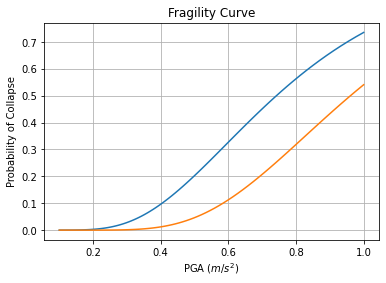

In [157]:
# Plot the fragility curve
import matplotlib.pyplot as plt
plt.plot(np.exp(lnIM_range), fragility_curve_nf)
plt.plot(np.exp(lnIM_range), fragility_curve_ff)
plt.xlabel('PGA ($m/s^2$)')
plt.ylabel('Probability of Collapse')
plt.title('Fragility Curve')
plt.grid(True)
plt.savefig('test_run_fragility_curve.png', bbox_inches='tight')
plt.show()
#plt.savefig("fragility curve test.png")